In [12]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [15]:
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [17]:
from datetime import datetime

In [18]:
# Import requests library
import requests

# Import the API key
from config import weather_api_key

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bef11af0409ff27987e3615bc3c2fdc6


In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    # Log URL,  record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    #Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),"Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp, "Humidity": city_humidity,
                          "Cloudiness": city_clouds, "Wind Speed": city_wind, "Country": city_country, "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that the Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sadovoye
Processing Record 2 of Set 1 | ahipara
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | gidam
Processing Record 5 of Set 1 | moose factory
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | pervomayskoye
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | sandpoint
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | beloha
Processing Record 15 of Set 1 | hamilton
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | burnie
Processing Record 19 of Set 1 | lichinga
Processing Record 20 of Set 1 | alvorada
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 1 | bluff
Process

Processing Record 40 of Set 4 | aleksandrovskoye
Processing Record 41 of Set 4 | namatanai
Processing Record 42 of Set 4 | aransas pass
Processing Record 43 of Set 4 | mercedes
Processing Record 44 of Set 4 | santa marta
Processing Record 45 of Set 4 | husavik
Processing Record 46 of Set 4 | college
Processing Record 47 of Set 4 | santa maria
Processing Record 48 of Set 4 | karratha
Processing Record 49 of Set 4 | leningradskiy
Processing Record 50 of Set 4 | sambava
Processing Record 1 of Set 5 | nurota
Processing Record 2 of Set 5 | griffith
Processing Record 3 of Set 5 | ust-nera
Processing Record 4 of Set 5 | menongue
Processing Record 5 of Set 5 | veraval
Processing Record 6 of Set 5 | septemvri
Processing Record 7 of Set 5 | talnakh
Processing Record 8 of Set 5 | lucea
Processing Record 9 of Set 5 | saint anthony
Processing Record 10 of Set 5 | chengmai
City not found. Skipping...
Processing Record 11 of Set 5 | ciudad guayana
Processing Record 12 of Set 5 | belmonte
Processing R

Processing Record 31 of Set 8 | oarai
Processing Record 32 of Set 8 | ullapool
Processing Record 33 of Set 8 | camopi
Processing Record 34 of Set 8 | la libertad
Processing Record 35 of Set 8 | tateyama
Processing Record 36 of Set 8 | nadym
Processing Record 37 of Set 8 | lingyuan
Processing Record 38 of Set 8 | lewistown
Processing Record 39 of Set 8 | mascote
Processing Record 40 of Set 8 | jiuquan
Processing Record 41 of Set 8 | saint-francois
Processing Record 42 of Set 8 | kaitangata
Processing Record 43 of Set 8 | wuchi
Processing Record 44 of Set 8 | ginir
Processing Record 45 of Set 8 | batemans bay
Processing Record 46 of Set 8 | heihe
Processing Record 47 of Set 8 | jacmel
Processing Record 48 of Set 8 | mirandopolis
Processing Record 49 of Set 8 | urucurituba
Processing Record 50 of Set 8 | wagga wagga
Processing Record 1 of Set 9 | imeni zhelyabova
Processing Record 2 of Set 9 | ancud
Processing Record 3 of Set 9 | muravlenko
Processing Record 4 of Set 9 | gaesti
Processing

Processing Record 23 of Set 12 | bandarbeyla
Processing Record 24 of Set 12 | seymchan
Processing Record 25 of Set 12 | rungata
City not found. Skipping...
Processing Record 26 of Set 12 | shush
Processing Record 27 of Set 12 | maceio
Processing Record 28 of Set 12 | jalgaon
Processing Record 29 of Set 12 | nouadhibou
Processing Record 30 of Set 12 | porto murtinho
Processing Record 31 of Set 12 | pathalgaon
Processing Record 32 of Set 12 | alvaraes
Processing Record 33 of Set 12 | santa isabel do rio negro
Processing Record 34 of Set 12 | jutai
Processing Record 35 of Set 12 | fort nelson
Processing Record 36 of Set 12 | rohnert park
Processing Record 37 of Set 12 | kunnamangalam
Processing Record 38 of Set 12 | chapais
Processing Record 39 of Set 12 | warqla
City not found. Skipping...
Processing Record 40 of Set 12 | smithers
Processing Record 41 of Set 12 | piryion
City not found. Skipping...
Processing Record 42 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 4

In [22]:
# Convert array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sadovoye,47.78,44.51,41.94,63,18,9.73,RU,2020-04-14 03:18:53
1,Ahipara,-35.17,173.17,63.27,63,39,23.49,NZ,2020-04-14 03:18:53
2,Hermanus,-34.42,19.23,55.99,92,0,1.01,ZA,2020-04-14 03:18:54
3,Gidam,18.98,81.40,92.57,22,0,3.09,IN,2020-04-14 03:18:54
4,Moose Factory,51.26,-80.61,15.80,85,90,20.80,CA,2020-04-14 03:18:54
5,Tiksi,71.69,128.87,3.06,88,5,5.64,RU,2020-04-14 03:18:54
6,Ushuaia,-54.80,-68.30,46.40,65,75,18.34,AR,2020-04-14 03:15:35
7,Rikitea,-23.12,-134.97,76.93,71,75,11.27,PF,2020-04-14 03:18:55
8,Pervomayskoye,43.92,46.71,40.96,78,0,8.21,RU,2020-04-14 03:18:55
9,Cherskiy,68.75,161.30,22.32,95,98,3.62,RU,2020-04-14 03:18:55


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_column_order]
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sadovoye,RU,2020-04-14 03:18:53,47.78,44.51,41.94,63,18,9.73
1,Ahipara,NZ,2020-04-14 03:18:53,-35.17,173.17,63.27,63,39,23.49
2,Hermanus,ZA,2020-04-14 03:18:54,-34.42,19.23,55.99,92,0,1.01
3,Gidam,IN,2020-04-14 03:18:54,18.98,81.40,92.57,22,0,3.09
4,Moose Factory,CA,2020-04-14 03:18:54,51.26,-80.61,15.80,85,90,20.80
5,Tiksi,RU,2020-04-14 03:18:54,71.69,128.87,3.06,88,5,5.64
6,Ushuaia,AR,2020-04-14 03:15:35,-54.80,-68.30,46.40,65,75,18.34
7,Rikitea,PF,2020-04-14 03:18:55,-23.12,-134.97,76.93,71,75,11.27
8,Pervomayskoye,RU,2020-04-14 03:18:55,43.92,46.71,40.96,78,0,8.21
9,Cherskiy,RU,2020-04-14 03:18:55,68.75,161.30,22.32,95,98,3.62


In [25]:
# Create the outputfile (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [28]:
# Import the time module.
import time

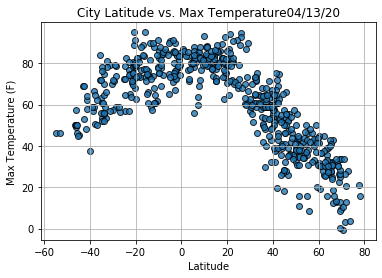

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

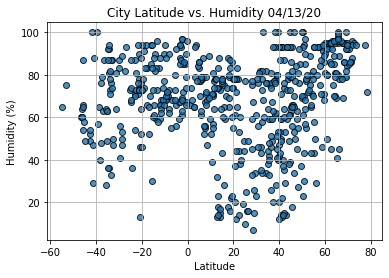

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

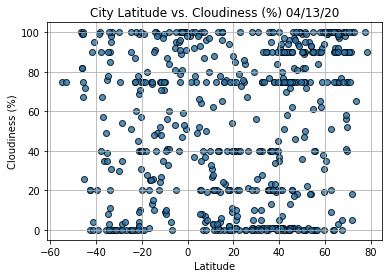

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

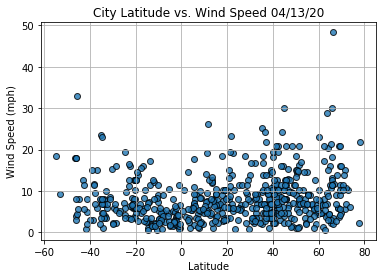

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
# Applying loc method to city df
index13 = city_data_df.loc[13]
index13

City                     Hamilton
Lat                         39.18
Lng                        -84.53
Max Temp                       43
Humidity                       80
Cloudiness                     90
Wind Speed                   3.36
Country                        US
Date          2020-04-14 03:18:57
Name: 13, dtype: object

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sadovoye,47.78,44.51,41.94,63,18,9.73,RU,2020-04-14 03:18:53
3,Gidam,18.98,81.40,92.57,22,0,3.09,IN,2020-04-14 03:18:54
4,Moose Factory,51.26,-80.61,15.80,85,90,20.80,CA,2020-04-14 03:18:54
5,Tiksi,71.69,128.87,3.06,88,5,5.64,RU,2020-04-14 03:18:54
8,Pervomayskoye,43.92,46.71,40.96,78,0,8.21,RU,2020-04-14 03:18:55


In [43]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

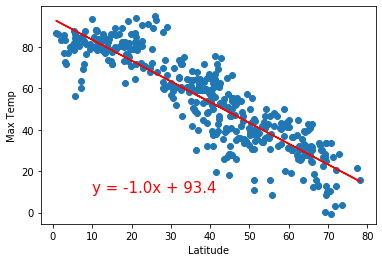

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df['Max Temp']
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp",(10,10))

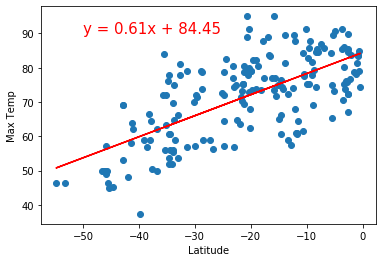

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

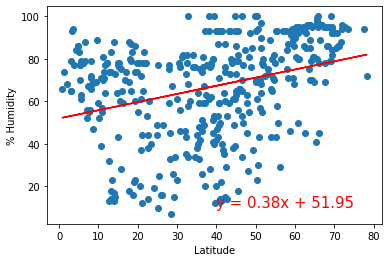

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

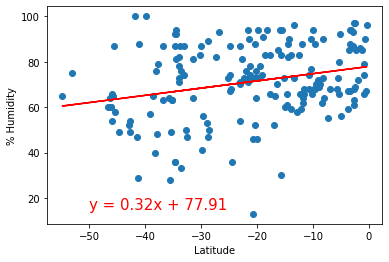

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

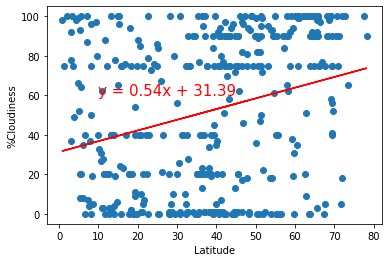

In [55]:
# linear regression on n hrmisphere 5 cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northen Hemisphere \n for % Cloudiness", "%Cloudiness", (10, 60))

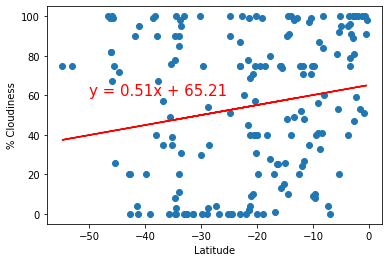

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

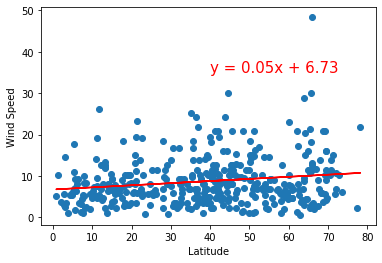

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))